# CSPY analyzer

In [1]:
#---------- for python2
from __future__ import print_function

In [2]:
#---------- import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
#---------- setting for plot
plt.rcParams['pdf.fonttype'] = 42 # Type42はpdfにフォント埋め込み可能

In [4]:
#---------- If you don't use seaborn, comment out this cell
import seaborn as sns
sns.set_style('darkgrid', {'axes.edgecolor': 'black', 'axes.linewidth': 1.0})
sns.set_context('talk', font_scale=1.5)
#sns.set_palette('deep')
sns.set_palette("dark")

## Data

In [5]:
def load_rslt():
    with open('./pkl_data/rslt_data.pkl', 'rb') as rdata:
        rslt_data = pickle.load(rdata)
    return rslt_data

In [6]:
rslt_data = load_rslt()

#---------- sort by ID
#rslt_data.head(10)

#---------- sort by Energy
rslt_data.sort_values(by=['Energy']).head(10)

,Struc_ID,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,Energy,Magmom,Opt
45,45,33,Pna2_1,227,Fd-3m,-43.378306,NaN,done
99,99,199,I2_13,206,Ia3,-42.107375,NaN,done
72,71,82,I-4,88,I4_1/a,-42.058120,NaN,done
65,63,220,I-43d,230,Ia-3d,-41.125565,NaN,done
18,18,220,I-43d,230,Ia-3d,-41.124710,NaN,done
27,27,191,P6/mmm,191,P6/mmm,-40.837615,NaN,done
66,64,217,I-43m,229,Im-3m,-40.794980,NaN,done
56,56,79,I4,97,I422,-40.714704,NaN,done
33,32,67,Cmme,191,P6/mmm,-40.687145,NaN,done
48,48,166,R-3m,221,Pm-3m,-40.669331,NaN,done


In [7]:
#---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

#---------- check success and error
nsuccess = rslt_data['Energy'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

#---------- minimum
Emin = rslt_data['Energy'].min()
print('Emin: {} eV'.format(Emin))

#---------- magmom (absolute value)
magmom = np.abs(rslt_data['Magmom'])
magmax = magmom.max()

Number of data: 100
Success: 83
Error: 17
Emin: -43.378306 eV


## Energy

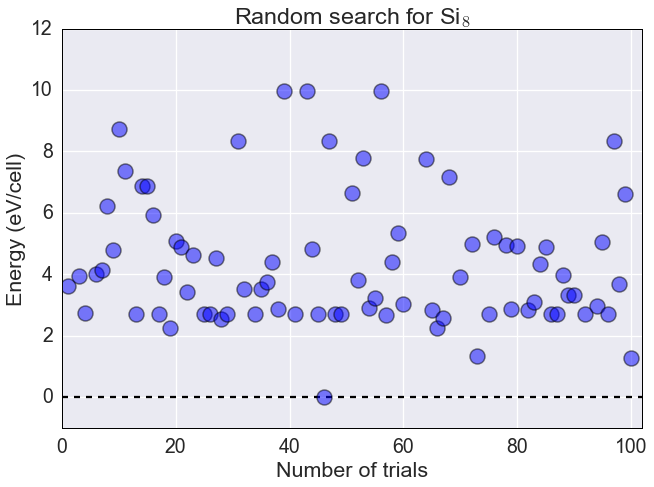

In [8]:
#---------- axis
plt.xlim([0, ndata+2])
plt.ylim([-1, 12])

#---------- hline at zero
plt.hlines(0.0, 0, 5000, 'k', '--')

#---------- plot
x = np.arange(1, ndata+1)
plt.plot(x,  rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1.5, alpha=0.5)

#---------- title and label
plt.title('Random search for Si$_{8}$')
plt.xlabel('Number of trials')
plt.ylabel('Energy (eV/cell)')

#---------- save figure
#plt.savefig('Si8_RS.png', bbox_inches='tight')
#plt.savefig('Si8_RS.png', bbox_inches='tight', dpi=300)    # high dpi
#plt.savefig('Si8_RS.pdf', bbox_inches='tight', dpi=300)    # high dpi

## Energy vs Magmom

In [ ]:
#---------- plot
plt.xlim([0, magmax+2])
plt.ylim([-5, 30])

plt.plot(magmom, rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1, alpha=0.5)

#---------- title and label
plt.title('Random search for Y$_2$Co$_{17}$')
plt.xlabel('Magnetic moment ($\mu_\mathrm{B}$/cell)')
plt.ylabel('Energy (eV/cell)')

#---------- save figure
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight')
#plt.savefig('Y2Co17_E_mag.pdf', bbox_inches='tight', dpi=300)    # high dpi
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight', dpi=300)    # high dpi